**Rules for the code:**

- Include all the code you used for your report in this file. The code for any section in the report should go under the same section in this file.
- Any missing code will result in -20% from its corresponding section in the report.
- Any irrelevant code will result in -20% from its corresponding section in the report.
- Make sure that you run your code before rendering, so all the necessary visual/numeric outputs are visible.
- Any code that is not properly run or throws errors will be considered missing/irrelevant.

## 3) Data

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## 5) Data Cleaning 

### a) Cleaning 1
*By \<Name of team member>*

### b) Cleaning 2
*By \<Name of team member>*

### c) Cleaning 3
*By \<Name of team member>*

### d) Cleaning 4
*By \<Katherine Yang>*

In [34]:
# check for missing values
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [35]:
# identifying outliers
Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['Exam_Score'] < lower_bound) | (data['Exam_Score'] > upper_bound)

print(outliers.sum())

104


In [36]:
# Checking for incorrect values in the data
data[data['Exam_Score'] < 0]
data[(data['Peer_Influence'] != "Negative") & (data['Peer_Influence'] != "Positive") & (data['Peer_Influence'] != "Neutral")]
data[(data['Access_to_Resources'] != "Low") & (data['Access_to_Resources'] != "Medium") & (data['Access_to_Resources'] != "High")]
data[(data['School_Type'] != "Private") & (data['School_Type'] != "Public")]
data[(data['Gender'] != "Male") & (data['Gender'] != "Female")]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


## 6) Data Analysis

### a) Analysis 1
*By \<Name of team member>*

### b) Analysis 2
*By \<Name of team member>*

### c) Analysis 3
*By \<Name of team member>*

### d) Analysis 4
*By \<Katherine Yang>*

In [37]:
from scipy.stats import pearsonr

data_ohe = pd.get_dummies(data) 
correlations = data_ohe.corrwith(data_ohe['Peer_Influence_Positive'])

p_values = data_ohe.drop(columns='Peer_Influence_Positive').apply(
    lambda col: pearsonr(data_ohe['Peer_Influence_Positive'], col)[1]
)

# combine correlations and p-values into a single df
results_df = pd.DataFrame({'Correlation': correlations, 'P-Value': p_values}).sort_values(by='Correlation', ascending=False)

print(results_df)

                                       Correlation        P-Value
Peer_Influence_Positive                   1.000000            NaN
Exam_Score                                0.081217   3.810652e-11
Extracurricular_Activities_Yes            0.023720   5.386633e-02
Distance_from_Home_Moderate               0.021028   8.743435e-02
Parental_Involvement_High                 0.017175   1.627502e-01
Family_Income_High                        0.014374   2.427231e-01
Learning_Disabilities_No                  0.013594   2.692478e-01
Hours_Studied                             0.011716   3.410249e-01
School_Type_Public                        0.011515   3.493477e-01
Internet_Access_No                        0.010248   4.049073e-01
Parental_Education_Level_Postgraduate     0.009275   4.509977e-01
Motivation_Level_Low                      0.006522   5.960694e-01
Teacher_Quality_Medium                    0.006200   6.143641e-01
Access_to_Resources_Medium                0.006064   6.221259e-01
Motivation

In [38]:
correlations = data_ohe.corrwith(data_ohe['Peer_Influence_Negative'])

p_values = data_ohe.drop(columns='Peer_Influence_Negative').apply(
    lambda col: pearsonr(data_ohe['Peer_Influence_Negative'], col)[1]
)

# combine correlations and p-values into a single df
results_df = pd.DataFrame({'Correlation': correlations, 'P-Value': p_values}).sort_values(by='Correlation', ascending=False)

print(results_df)

                                       Correlation        P-Value
Peer_Influence_Negative                   1.000000            NaN
Parental_Education_Level_College          0.032057   9.164227e-03
Parental_Involvement_Low                  0.023511   5.600976e-02
Gender_Female                             0.017271   1.604094e-01
Family_Income_Low                         0.015272   2.145279e-01
Teacher_Quality_Medium                    0.013636   2.677705e-01
Access_to_Resources_High                  0.012519   3.089485e-01
Extracurricular_Activities_Yes            0.011589   3.462746e-01
Motivation_Level_Low                      0.010887   3.762785e-01
Motivation_Level_High                     0.010348   4.003646e-01
Learning_Disabilities_Yes                 0.008686   4.802502e-01
Physical_Activity                         0.008167   5.068434e-01
Sleep_Hours                               0.007611   5.362145e-01
Internet_Access_Yes                       0.007050   5.666789e-01
Previous_S

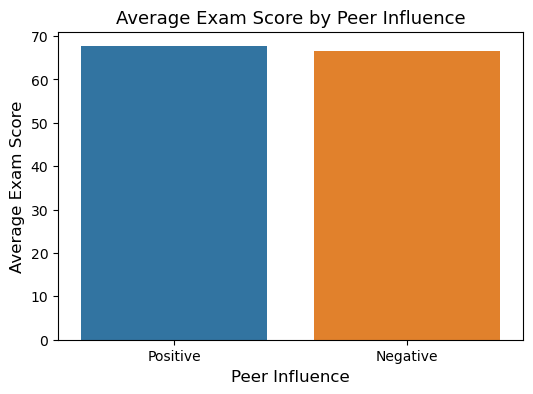

In [39]:
peer_influence_scores = {
    'Peer Influence': ['Positive', 'Negative'],
    'Average Exam Score': [
        data_ohe.loc[data_ohe['Peer_Influence_Positive'] == 1, 'Exam_Score'].mean(),
        data_ohe.loc[data_ohe['Peer_Influence_Negative'] == 1, 'Exam_Score'].mean()
    ]
}

plot_data = pd.DataFrame(peer_influence_scores)

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Peer Influence', y='Average Exam Score', data=plot_data)

# Customize the plot
plt.title('Average Exam Score by Peer Influence', fontsize=13)
plt.xlabel('Peer Influence', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [40]:
grouped_data = data_ohe.groupby(['Peer_Influence_Positive', 'Peer_Influence_Negative'])['Exam_Score'].mean().reset_index()
print(grouped_data)

   Peer_Influence_Positive  Peer_Influence_Negative  Exam_Score
0                    False                    False   67.197917
1                    False                     True   66.564270
2                     True                    False   67.623199


In [41]:
# Calculating 95% Confidence Interval
def bootstrap_ci(data_ohe):
    samples = np.random.choice(data_ohe, size=(1000, len(data_ohe)), replace=True)
    
    sample_means = samples.mean(axis=1)
    
    lower_bound = (np.percentile(sample_means, 2.5))
    upper_bound = (np.percentile(sample_means, 97.5))
    
    return lower_bound, upper_bound

grouped_data_positive = data_ohe[data_ohe['Peer_Influence_Positive'] == 1]['Exam_Score']
grouped_data_negative = data_ohe[data_ohe['Peer_Influence_Negative'] == 1]['Exam_Score']

positive_lower, positive_upper = bootstrap_ci(grouped_data_positive)
negative_lower, negative_upper = bootstrap_ci(grouped_data_negative)

print(f"Peer Influence Positive - 95% CI: [{positive_lower}, {positive_upper}]")
print(f"Peer Influence Negative - 95% CI: [{negative_lower}, {negative_upper}]")

Peer Influence Positive - 95% CI: [67.47040371493556, 67.77601402577712]
Peer Influence Negative - 95% CI: [66.36305374001452, 66.76762890341323]


In [42]:
correlations = data_ohe.corrwith(data_ohe['Access_to_Resources_High'])

p_values = data_ohe.drop(columns='Access_to_Resources_High').apply(
    lambda col: pearsonr(data_ohe['Access_to_Resources_High'], col)[1]
)

# combine correlations and p-values into a single df
results_df = pd.DataFrame({'Correlation': correlations, 'P-Value': p_values}).sort_values(by='Correlation', ascending=False)

print(results_df)

                                       Correlation        P-Value
Access_to_Resources_High                  1.000000            NaN
Exam_Score                                0.143766   7.525969e-32
School_Type_Private                       0.029798   1.543010e-02
Family_Income_Low                         0.021740   7.722948e-02
Motivation_Level_Medium                   0.016732   1.738726e-01
Previous_Scores                           0.014023   2.544241e-01
Parental_Education_Level_High School      0.012940   2.929552e-01
Peer_Influence_Negative                   0.012519   3.089485e-01
Parental_Involvement_Low                  0.011798   3.376332e-01
Teacher_Quality_Low                       0.011718   3.409348e-01
Distance_from_Home_Far                    0.009172   4.560397e-01
Internet_Access_No                        0.008554   4.869583e-01
Learning_Disabilities_No                  0.006200   6.143629e-01
Gender_Female                             0.004084   7.399906e-01
Hours_Stud

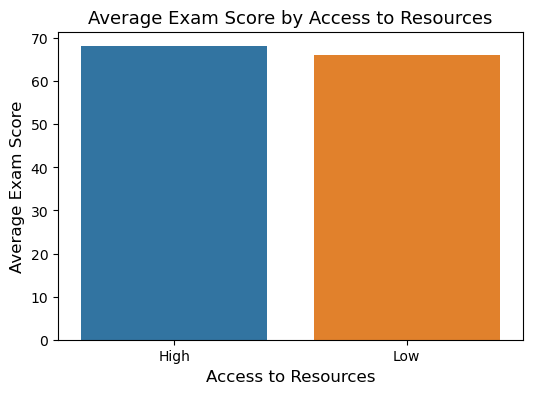

In [43]:
resources_scores = {
    'Access to Resources': ['High', 'Low'],
    'Average Exam Score': [
        data_ohe.loc[data_ohe['Access_to_Resources_High'] == 1, 'Exam_Score'].mean(),
        data_ohe.loc[data_ohe['Access_to_Resources_Low'] == 1, 'Exam_Score'].mean()
    ]
}

plot_data = pd.DataFrame(resources_scores)

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Access to Resources', y='Average Exam Score', data=plot_data)

# Customize the plot
plt.title('Average Exam Score by Access to Resources', fontsize=13)
plt.xlabel('Access to Resources', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [44]:
grouped_data = data_ohe.groupby(['Access_to_Resources_High', 'Access_to_Resources_Low'])['Exam_Score'].mean().reset_index()
print(grouped_data)

   Access_to_Resources_High  Access_to_Resources_Low  Exam_Score
0                     False                    False   67.134378
1                     False                     True   66.203351
2                      True                    False   68.092152


In [45]:
# Calculating the 95% Confidence Interval

grouped_data_high = data_ohe[data_ohe['Access_to_Resources_High'] == 1]['Exam_Score']
grouped_data_low = data_ohe[data_ohe['Access_to_Resources_Low'] == 1]['Exam_Score']

positive_lower, positive_upper = bootstrap_ci(grouped_data_high)
negative_lower, negative_upper = bootstrap_ci(grouped_data_low)

print(f"Access to Resources High - 95% CI: [{positive_lower}, {positive_upper}]")
print(f"Access to Resources Low - 95% CI: [{negative_lower}, {negative_upper}]")

Access to Resources High - 95% CI: [67.91997468354431, 68.26587341772152]
Access to Resources Low - 95% CI: [66.02587585681646, 66.3990860624524]


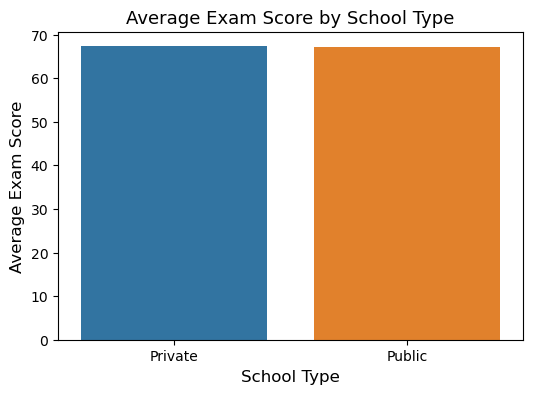

In [46]:
school_type_scores = {
    'School Type': ['Private', 'Public'],
    'Average Exam Score': [
        data_ohe.loc[data_ohe['School_Type_Private'] == 1, 'Exam_Score'].mean(),
        data_ohe.loc[data_ohe['School_Type_Public'] == 1, 'Exam_Score'].mean()
    ]
}

plot_data = pd.DataFrame(school_type_scores)

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='School Type', y='Average Exam Score', data=plot_data)

# Customize the plot
plt.title('Average Exam Score by School Type', fontsize=13)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [47]:
grouped_data = data_ohe.groupby(['School_Type_Private', 'School_Type_Public'])['Exam_Score'].mean().reset_index()
print(grouped_data)

   School_Type_Private  School_Type_Public  Exam_Score
0                False                True   67.212919
1                 True               False   67.287705


In [48]:
# Calculating the 95% Confidence Interval

grouped_data_private = data_ohe[data_ohe['School_Type_Private'] == 1]['Exam_Score']
grouped_data_public = data_ohe[data_ohe['School_Type_Public'] == 1]['Exam_Score']

positive_lower, positive_upper = bootstrap_ci(grouped_data_private)
negative_lower, negative_upper = bootstrap_ci(grouped_data_public)

print(f"School Type Private - 95% CI: [{positive_lower}, {positive_upper}]")
print(f"School Type Public - 95% CI: [{negative_lower}, {negative_upper}]")

School Type Private - 95% CI: [67.12543554006969, 67.45149328023892]
School Type Public - 95% CI: [67.10285450195738, 67.3290724227925]
